In [6]:
import math
import random
import pandas as pd
import numpy as np

data = pd.read_csv("data.csv")
train_X = data.values[:, 1:]

# массивы для хранения коэффициентов для нормировки
A = []
B = []

#случайные значения
W = []
K=4
M=len(train_X)
N = len(train_X[0])

la = 0.3 # коэффициент обучения
dla = 0.05 # уменьшение коэффициента обучения
epochs = 6
arr_for_paint=[]


for i in range(len(train_X)):
    if train_X[i][0] == 'm':
        train_X[i][0]= 1.00
    else:
        train_X[i][0]= 0.00
        
for i in range(len(train_X)):    
    if train_X[i][1] == 'yes':
        train_X[i][1]= 1.00
    else:
        train_X[i][1]= 0.00
print(train_X)
    # нормировка исходных данных
for i in range(len(train_X[0])):
    max_ = float(train_X[0][i])
    min_ = float(train_X[0][i])
    for j in range(len(train_X)):
        train_X[j][i] = float(train_X[j][i])
        if abs(train_X[j][i]) > max_:
            max_ = abs(train_X[j][i])
        else:
            if abs(train_X[j][i]) < min_:
                min_ = abs(train_X[j][i])
    # коэффициенты нормирования
    a = 1 / (max_- min_)
    b = -min_ / (max_ - min_)
    # сохранить коэффициенты    
    A.append(a)
    B.append(b)
    # нормировать    
    for j in range(len(data)):
        train_X[j][i] = a * train_X[j][i] + b

# получить случайное значение для инициализирования весов       
def get_w():
    z = random.random() * (2.0 / math.sqrt(M))
    return 0.5 - (1 / math.sqrt(M)) + z
    
# инициализировать веса
for i in range(K):
    W.append([])
    for j in range(N):
        W[i].append(get_w() * 0.5)
        
# расстояние между векторами
def rho(w, x, dest):
    r = 0
    #эвклидово расстояние
    if dest == 0:
        for i in range(len(w)):
            r = r + (w[i] - x[i])*(w[i] - x[i])
        r = math.sqrt(r)
    # квадрат эвклидова расстояния
    elif dest == 1:
        for i in range(len(w)):
            r = r + (w[i] - x[i])*(w[i] - x[i])
        r = r*r
     # манхэтэнское расстояния
    elif dest == 2:
        for i in range(len(w)):
            r = r + abs((w[i] - x[i])*(w[i] - x[i]))
      # чэбышева
    elif dest == 3:
        for i in range(len(w)):
            max = 0
            r = abs(w[i] - x[i])*(w[i] - x[i])
            if r > max:
                max = r
        r = max
    return r

# поиск ближайшего вектора 
def FindNear(W, x):
    wm = W[0]
    r = rho(wm, x, 2)
    i = 0
    i_n = i
    for w in W:
        if rho(w, x, 2) < r:
            r = rho(w, x, 2)
            wm = w
            i_n = i
        i = i + 1
    return (wm, i_n)

def fit(la, train_X, W):
    Wk =[]
    # начать процесс обучения
    while la >= 0:
        for k in range(epochs): 
            for x in train_X:
                wm = FindNear(W, x)[0]
                for i in range(len(wm)):
                    wm[i] = wm[i] + la * (x[i] - wm[i]) # корректировка весов
                    arr_for_paint.append(wm)
        print(wm) 
        la = la - dla # уменьшение коэффициента обучения
    return wm
fit(la, train_X, W)

# массив для денормированных весов
WX = list() 
    
# денормировать веса
for i in range(K):
    WX.append(list())
    for j in range(N):
        WX[i].append((W[i][j] - B[j]) / A[j])
    
# print(WX) # печать денормированных весов

# создать классы     
Data = list() 

for i in range(len(W)):
    Data.append(list())

# отнести исходные данные к своему классу    
DS = list()
i = 0
for x in train_X:
    i_n = FindNear(W, x)[1]
    Data[i_n].append(x)
    DS.append([i_n, train_X[i]])
    i = i + 1
    
print(DS)

[[1.0 1.0 60 79 60 72 63 1.0]
 [1.0 0.0 60 61 30 5 17 0.0]
 [0.0 0.0 60 61 30 66 58 0.0]
 [1.0 1.0 85 78 72 70 85 1.25]
 [0.0 1.0 65 78 60 67 65 1.0]
 [0.0 1.0 60 78 60 67 65 1.0]
 [0.0 1.0 55 79 56 69 72 0.0]
 [1.0 0.0 55 56 50 56 60 0.0]
 [1.0 0.0 55 60 21 64 50 0.0]
 [1.0 0.0 60 56 30 16 17 0.0]
 [0.0 1.0 85 89 85 92 85 1.75]
 [0.0 1.0 60 88 76 66 60 1.25]
 [1.0 0.0 55 64 0 9 50 0.0]
 [0.0 1.0 80 83 62 72 72 1.25]
 [1.0 0.0 55 10 3 8 50 0.0]
 [0.0 1.0 60 67 57 64 50 0.0]
 [1.0 1.0 75 98 86 82 85 1.5]
 [0.0 1.0 85 85 81 85 72 1.25]
 [1.0 1.0 80 56 50 69 50 0.0]
 [1.0 0.0 55 60 30 8 60 0.0]]
[0.9999997712976278, 5.708276565210647e-08, 0.025099563892164015, 0.43827928587558507, 0.22567258951872313, 0.12614922413274682, 0.4683674893469958, 8.59009116584843e-08]
[0.9999999999987063, 3.2290745289874e-13, 0.02884410081527968, 0.44455211061550975, 0.23065957724148653, 0.1423029206704375, 0.4538034957008189, 4.859267813751636e-13]
[0.9999999999999998, 2.746992809219867e-17, 0.032652208367369

In [7]:
result = pd.DataFrame(DS)

In [8]:
middle_result = []
middle_result.append(1)

In [9]:
middle_result[0] = middle_result[0]+1

In [10]:
middle_result

[2]

In [11]:
res = [0,0,0,0]
des = ['','','','']
for i in range(len(DS)):
    if DS[i][0] == 0:
        res[0]+=1
        if DS[i][1][0] == 1.0 and DS[i][1][1] == 1.0:
            des[0] = 'М_да'
        elif DS[i][1][0] == 1.0 and DS[i][1][1] == 0.0:
            des[0] = 'М_нет'
        elif DS[i][1][0] == 0.0 and DS[i][1][1] == 0.0:
            des[0] = 'Ж_нет'
        elif DS[i][1][0] == 0.0 and DS[i][1][1] == 1.0:
            des[0] = 'Ж_да'
    elif DS[i][0] == 1:
        res[1]+=1
        if DS[i][1][0] == 1.0 and DS[i][1][1] == 1.0:
            des[1] = 'М_да'
        elif DS[i][1][0] == 1.0 and DS[i][1][1] == 0.0:
            des[1] = 'М_нет'
        elif DS[i][1][0] == 0.0 and DS[i][1][1] == 0.0:
            des[1] = 'Ж_нет'
        elif DS[i][1][0] == 0.0 and DS[i][1][1] == 1.0:
            des[1] = 'Ж_да'
    elif DS[i][0] == 2:
        res[2]+=1
        if DS[i][1][0] == 1.0 and DS[i][1][1] == 1.0:
            des[2] = 'М_да'
        elif DS[i][1][0] == 1.0 and DS[i][1][1] == 0.0:
            des[2] = 'М_нет'
        elif DS[i][1][0] == 0.0 and DS[i][1][1] == 0.0:
            des[2] = 'Ж_нет'
        elif DS[i][1][0] == 0.0 and DS[i][1][1] == 1.0:
            des[2] = 'Ж_да'
    elif DS[i][0] == 3:
        res[3]+=1
        if DS[i][1][0] == 1.0 and DS[i][1][1] == 1.0:
            des[3] = 'М_да'
        elif DS[i][1][0] == 1.0 and DS[i][1][1] == 0.0:
            des[3] = 'М_нет'
        elif DS[i][1][0] == 0.0 and DS[i][1][1] == 0.0:
            des[3] = 'Ж_нет'
        elif DS[i][1][0] == 0.0 and DS[i][1][1] == 1.0:
            des[3] = 'Ж_да'
for i in range(len(res)):
    res[i] = res[i]/len(DS)

print(res)
print(des)

[0.6, 0.05, 0.0, 0.35]
['М_да', 'Ж_нет', '', 'М_нет']


In [12]:

for i in range(len(DS)):
    if DS[i][1][0] == 1.0 && DS[i][1][1] == 1.0:
        
        res[0]+=1
    elif DS[i][0] == 1:
        res[1]+=1
    elif DS[i][0] == 2:
        res[2]+=1
    elif DS[i][0] == 3:
        res[3]+=1
for i in range(len(res)):
    res[i] = res[i]/len(DS)


SyntaxError: invalid syntax (<ipython-input-12-c84b365e1e31>, line 2)

In [13]:
print(result)

    0                                                  1
0   0  [1.0, 1.0, 0.16666666666666674, 0.784090909090...
1   3  [1.0, 0.0, 0.16666666666666674, 0.579545454545...
2   1  [0.0, 0.0, 0.16666666666666674, 0.579545454545...
3   0  [1.0, 1.0, 1.0000000000000002, 0.7727272727272...
4   0  [0.0, 1.0, 0.33333333333333326, 0.772727272727...
5   0  [0.0, 1.0, 0.16666666666666674, 0.772727272727...
6   0  [0.0, 1.0, 0.0, 0.7840909090909091, 0.65116279...
7   3  [1.0, 0.0, 0.0, 0.5227272727272727, 0.58139534...
8   3  [1.0, 0.0, 0.0, 0.5681818181818182, 0.24418604...
9   3  [1.0, 0.0, 0.16666666666666674, 0.522727272727...
10  0  [0.0, 1.0, 1.0000000000000002, 0.8977272727272...
11  0  [0.0, 1.0, 0.16666666666666674, 0.886363636363...
12  3  [1.0, 0.0, 0.0, 0.6136363636363636, 0.0, 0.045...
13  0  [0.0, 1.0, 0.8333333333333333, 0.8295454545454...
14  3  [1.0, 0.0, 0.0, 1.3877787807814457e-17, 0.0348...
15  0  [0.0, 1.0, 0.16666666666666674, 0.647727272727...
16  0  [1.0, 1.0, 0.66666666666

In [14]:
X = data['id']
Y= data['cof']
C = result[0]

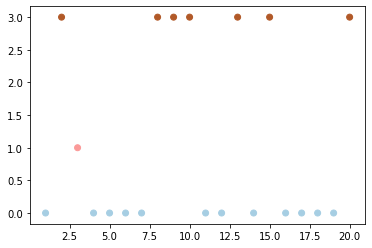

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X, C, c=C, cmap=plt.cm.Paired)
plt.show()

In [33]:
import plotly.express as px
fig = px.scatter(data, x=X, y=C, color=C)
fig.show()
fig.write_html("fig.html")